# MSA 2024 Phase 2 - Part 1


In [155]:
import sklearn  # Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
import numpy as np  # NumPy is used for handling numerical series operations (addition, multiplication, and ...)
import pandas as pd  # Pandas library is used for handling tabular data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

### 1.1 Load data and display

In [320]:
# Read file
df = pd.read_csv("../0. Resources/datasets/X store sales/store_sales.csv", encoding='latin_1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [195]:
# Get more information about the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [157]:
# Display the first ten instances
df.iloc[0:10]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


In [221]:
# Learn more about columns details
df["Ship Mode"].unique()
df["Segment"].unique()
df["Country"].unique()
df["State"].unique()
df["Region"].unique()
df["Category"].unique()
df["Sub-Category"].unique()


array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

### 1.2 Find key statistical measures

In [158]:
# Find key statistical measures such as mean and standard deviation.
mean_sales = df["Sales"].mean()
mean_quantity = df["Quantity"].mean()
mean_discount = df["Discount"].mean()
mean_profit = df["Profit"].mean()
print(mean_sales, mean_quantity, mean_discount, mean_profit)

df[["Sales","Quantity","Discount","Profit"]].describe()

349.8348869872702 3.785007072135785 0.1739226779820839 8.699327109853845


,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000
mean,349.834887,3.785007,0.173923,8.699327
std,503.179145,2.251620,0.181547,136.049246
min,1.892000,1.000000,0.000000,-1862.312400
25%,47.040000,2.000000,0.000000,-12.849000
50%,182.220000,3.000000,0.200000,7.774800
75%,435.168000,5.000000,0.300000,33.726600
max,4416.174000,14.000000,0.700000,1013.127000


### 1.3 Visualize numerical columns

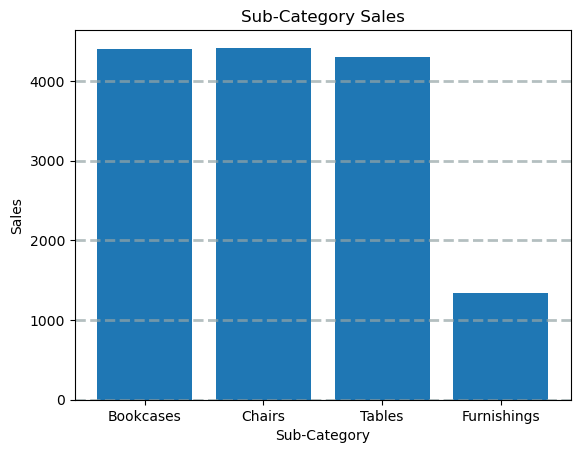

In [159]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Create a bar plot of Sub-Category vs Sales
plt.bar(x= df["Sub-Category"], height= df.Sales) 

# Customize the chart
plt.title('Sub-Category Sales')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Display the plot
plt.show() 

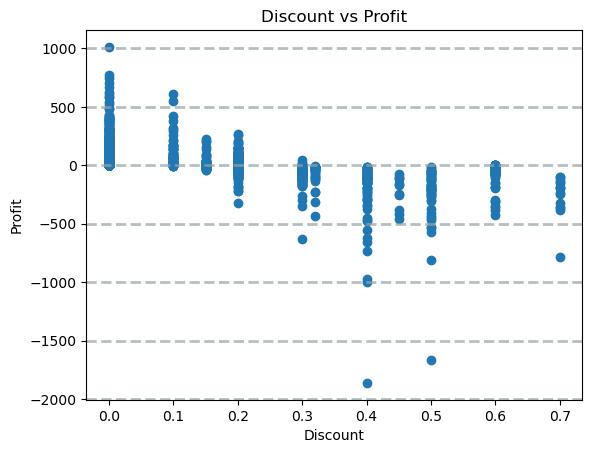

In [160]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Create a scatter plot of Discount and Profit
plt.scatter(x= df.Discount, y= df.Profit) 

# Customize the chart
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Display the plot
plt.show() 

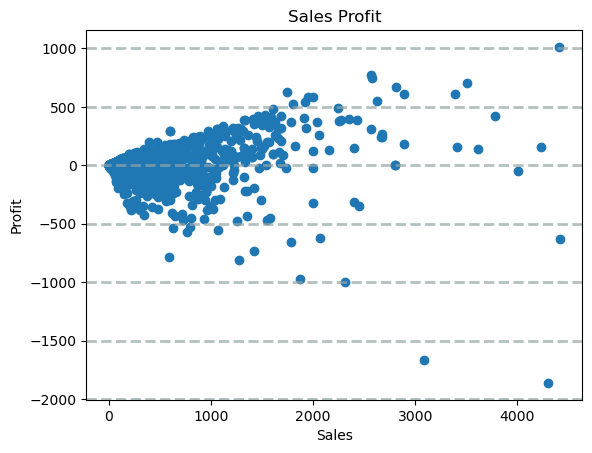

In [161]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Create a scatter plot of Sales vs Profit
plt.scatter(x= df.Sales, y= df.Profit) 

# Customize the chart
plt.title('Sales Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Display the plot
plt.show() 

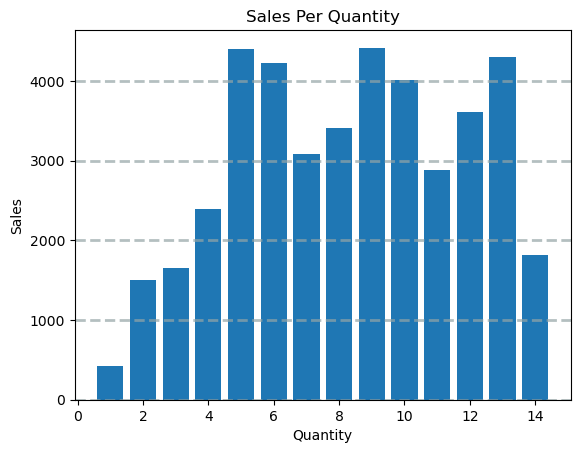

In [162]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Create a bar plot of Quantity vs Sales
plt.bar(x= df.Quantity,height= df.Sales) 

# Customize the chart
plt.title('Sales Per Quantity')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Display the plot
plt.show() 

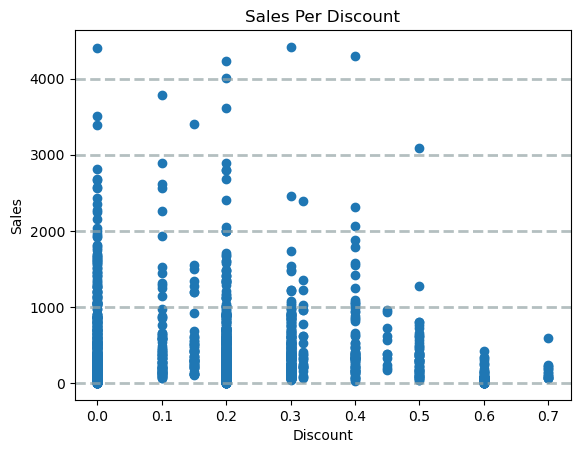

In [163]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Create a scatter plot of Discount and Sales
plt.scatter(x= df.Discount,y= df.Sales) 

# Customize the chart
plt.title('Sales Per Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Display the plot
plt.show() 

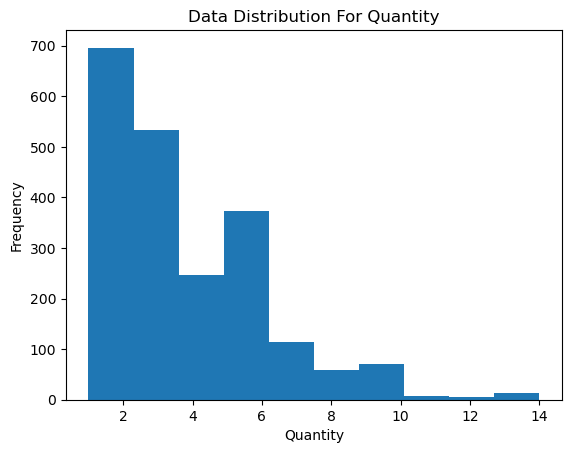

In [178]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Visualize the data as a histogram and see how frequently each value for the variable occurs.

# Plot a histogram
plt.hist(df['Quantity'])

# Add titles and labels
plt.title('Data Distribution For Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Show the plot
plt.show()

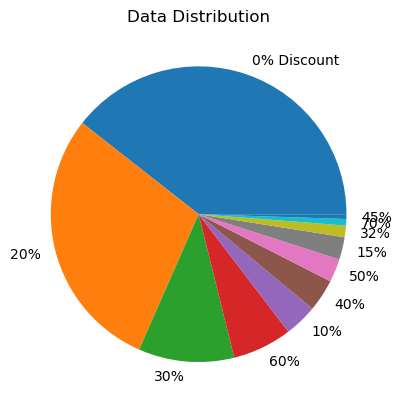

In [179]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Return a Series containing counts of each discount value.
var_data = df['Discount'].value_counts() 

# The result comes from var_date where the first element is the most frequently-occurring element.
labels = ['0% Discount','20%','30%','60%','10%','40%','50%','15%','32%','70%','45%'] 

# Plot a pie
plt.pie(var_data, labels=labels)

# Add titles
plt.title('Data Distribution')

# Show the plot
plt.show()

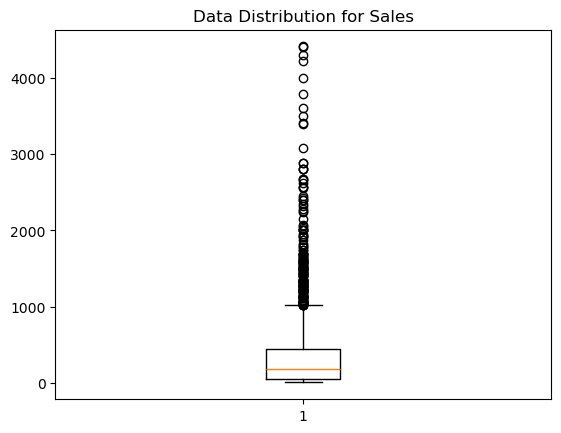

In [180]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Plot a box and whisker plots
plt.boxplot(df['Sales'])

# Add titles and labels
plt.title('Data Distribution for Sales')

# Show the figure
plt.show()

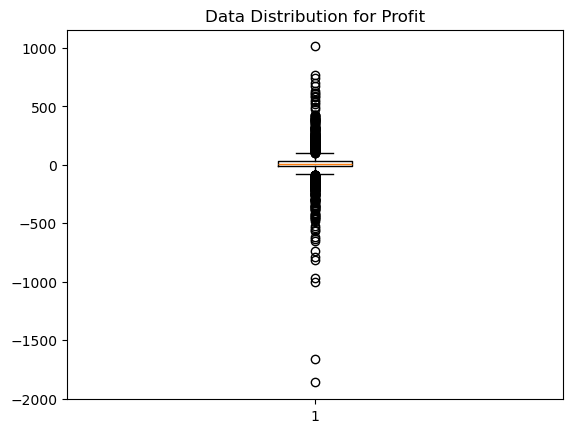

In [181]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Plot a box and whisker plots
plt.boxplot(df['Profit'])

# Add titles and labels
plt.title('Data Distribution for Profit')

# Show the plot
plt.show()

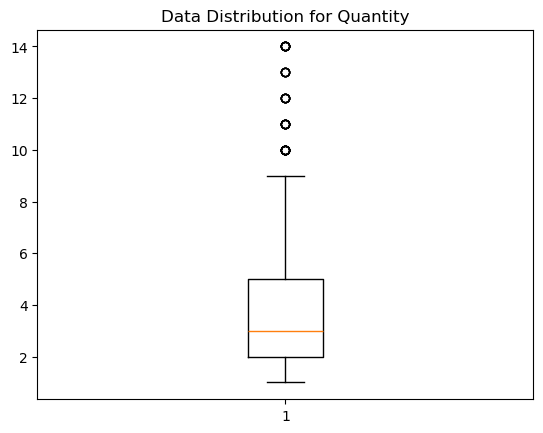

In [250]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Plot a box and whisker plots
plt.boxplot(df['Quantity'])

# Add titles and labels
plt.title('Data Distribution for Quantity')

# Show the plot
plt.show()

### 1.4 Convert data types

In [322]:
# Convert data types of columns as needed, ensuring all values fed into machine learning models are numerical.

# Date, ship mode, ID?, segment,


# Convert Date to Date type
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

df.info()
df.sort_values(by="Order Date", inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

## 2. Visualise data

In [312]:
# Find the top 10 Most Valuable customers

# Which states and cities are generating the highest revenue?
# Which Region is the Most Profitable?

# Which product category and Sub-Categoryis both the best-selling and the most profitable?
# Which product sub-categories and specific products are top performers as well as those that are underperforming?
# Are there products that are frequently bought together?
# Which is the Top Selling Sub-Category?

# Which customer segment is bringing in the most profit/ taking the most orders?
# What is the most preferred shipping mode among our customers?
# How has the company's performance trended over recent months?
# What are the KPIs?

# time series - sorting data by order date
#Plotting the data to understand the sales distribution from the year 2015-2018


<class 'pandas.core.frame.DataFrame'>
Index: 2029 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2029 non-null   int64         
 1   Order ID       2029 non-null   object        
 2   Order Date     2029 non-null   datetime64[ns]
 3   Ship Date      2029 non-null   datetime64[ns]
 4   Ship Mode      2029 non-null   object        
 5   Customer ID    2029 non-null   object        
 6   Customer Name  2029 non-null   object        
 7   Segment        2029 non-null   object        
 8   Country        2029 non-null   object        
 9   City           2029 non-null   object        
 10  State          2029 non-null   object        
 11  Postal Code    2029 non-null   int64         
 12  Region         2029 non-null   object        
 13  Product ID     2029 non-null   object        
 14  Category       2029 non-null   object        
 15  Sub-Category   2029 non-nu

### 2.1 Sales with respect to geographical features

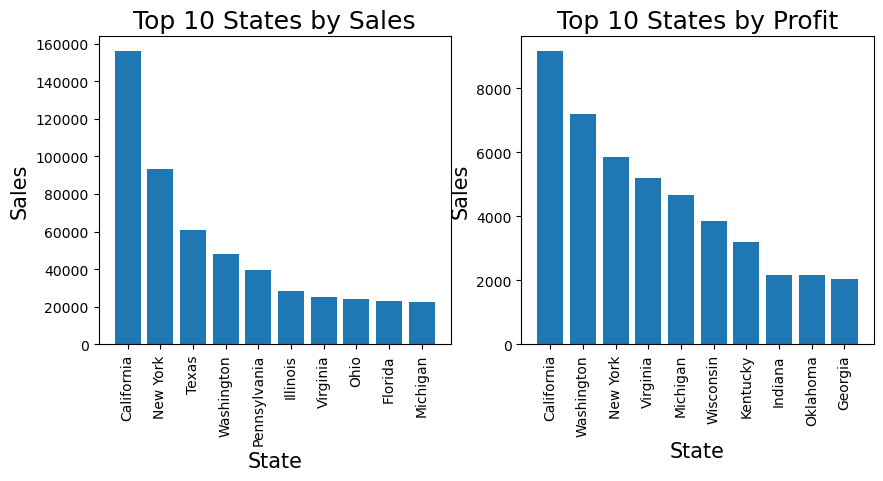

In [352]:
# Which states are generating the highest revenue?

fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Sort the State as per the sales, round to 2 decimal places and show the top 10 states.
top_state1 = df.groupby(['State'])[['Sales', 'Quantity']].sum().sort_values('Sales',ascending = False).round(2).head(10)
top_state2 = df.groupby(['State'])[['Sales', 'Quantity', 'Profit']].sum().sort_values('Profit',ascending = False).round(2).head(10)

# Since we have used groupby, we will have to reset the index to add the state into dataframe 
top_state1.reset_index(inplace=True) 
top_state2.reset_index(inplace=True) 

ax[0].bar(top_state1["State"],top_state1["Sales"])
ax[0].set_title("Top 10 States by Sales", fontsize=18) 
ax[0].set_xlabel("State",fontsize=15) # x axis shows the customers 
ax[0].set_ylabel("Sales",fontsize=15) # y axis shows the Revenue
ax[0].tick_params(axis='x', labelrotation = 90)

ax[1].bar(top_state2["State"],top_state2["Profit"])
ax[1].set_title("Top 10 States by Profit", fontsize=18) 
ax[1].set_xlabel("State",fontsize=15) # x axis shows the customers 
ax[1].set_ylabel("Sales",fontsize=15) # y axis shows the Revenue
ax[1].tick_params(axis='x', labelrotation = 90)

plt.show()

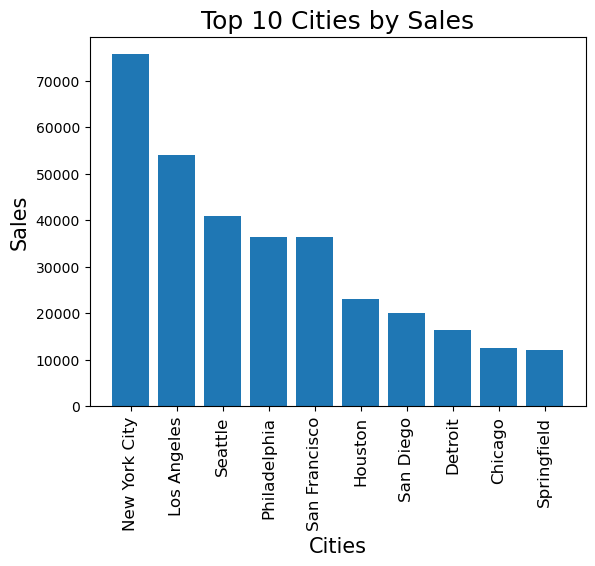

In [335]:
# Which cities are generating the highest revenue?

# Sort the cities as per the sales, round to 2 decimal places and show the top 10 cities.
top_cities = df.groupby(['City'])[['Sales', 'Quantity']].sum().sort_values('Sales',ascending = False).round(2).head(10)

# Since we have used groupby, we will have to reset the index to add the cities into dataframe 
top_cities.reset_index(inplace=True) 

plt.bar(top_cities["City"],top_cities["Sales"])
plt.title("Top 10 Cities by Sales", fontsize=18) 
plt.xlabel("Cities",fontsize=15) # x axis shows the customers 
plt.ylabel("Sales",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.show()

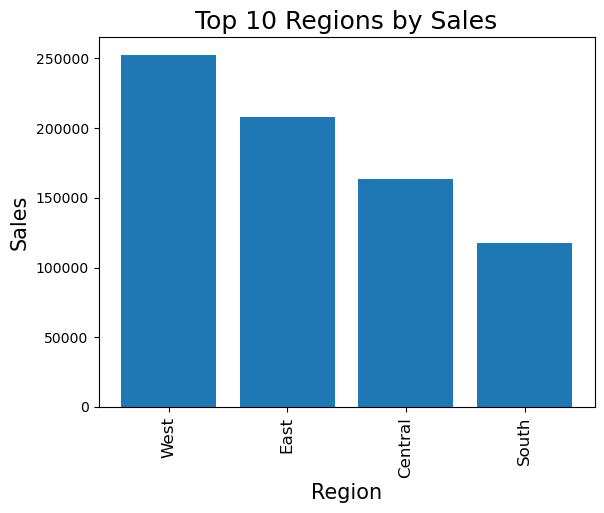

In [337]:
# Which regions are generating the highest revenue?

# Sort the regions as per the sales, round to 2 decimal places.
top_regions = df.groupby(['Region'])[['Sales', 'Quantity']].sum().sort_values('Sales',ascending = False).round(2)

# Since we have used groupby, we will have to reset the index to add the regions into dataframe 
top_regions.reset_index(inplace=True) 

plt.bar(top_regions["Region"],top_regions["Sales"])
plt.title("Top 10 Regions by Sales", fontsize=18) 
plt.xlabel("Region",fontsize=15) # x axis shows the customers 
plt.ylabel("Sales",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.show()

## 3. Clean data

### 3.1 Checking for missing values

In [319]:
# Checking for missing values/ duplicate values

df.info()
df.isnull().sum()

# No missing and duplicate values

<class 'pandas.core.frame.DataFrame'>
Index: 2029 entries, 1626 to 186
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2029 non-null   int64         
 1   Order ID       2029 non-null   object        
 2   Order Date     2029 non-null   datetime64[ns]
 3   Ship Date      2029 non-null   datetime64[ns]
 4   Ship Mode      2029 non-null   object        
 5   Customer ID    2029 non-null   object        
 6   Customer Name  2029 non-null   object        
 7   Segment        2029 non-null   object        
 8   Country        2029 non-null   object        
 9   City           2029 non-null   object        
 10  State          2029 non-null   object        
 11  Postal Code    2029 non-null   int64         
 12  Region         2029 non-null   object        
 13  Product ID     2029 non-null   object        
 14  Category       2029 non-null   object        
 15  Sub-Category   2029 non-

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### 3.2 Checking for duplicate values

In [ ]:
df.duplicated().sum()

### 3.3 Checking for outliers

In [290]:
# Outliers by removing them and standardising/normalising them so that all our feature ranges are similar to each other, which helps our model learn better.

# All column (numerical) values are within 3 standard deviations from the mean
cols = df[["Sales","Quantity","Profit"]].columns 
df_sub = df
df_sub1 = df[["Sales","Quantity","Profit"]]

# z-score filter: z-score < 3
lim = np.abs((df_sub1 - df_sub1.mean()) / df_sub1.std(ddof=0)) < 3

# replace outliers with nan
df_sub.loc[:, cols] = df_sub1.where(lim, np.nan)

# drop rows with NaN in any column
df_sub.dropna(inplace=True) 

df_sub.iloc[0:10]

/var/folders/40/3zy15r0x1_s8rq3ynfcvdz140000gn/T/ipykernel_17616/1879570048.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2. 3. 5. ... 1. 3. 2.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_sub.loc[:, cols] = df_sub1.where(lim, np.nan)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0,0.00,14.1694
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9.0,0.20,85.3092
5,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2.0,0.30,-1.0196
6,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3.0,0.00,240.2649
8,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3.0,0.20,15.5250
9,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5.0,0.60,-147.9630
10,39,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3.0,0.32,-46.9764


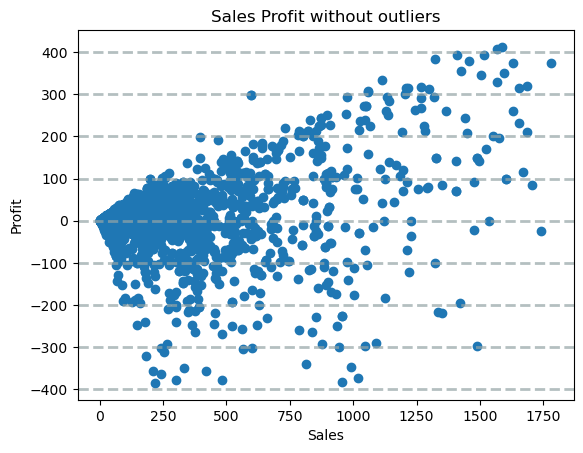

In [291]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Create a scatter plot of Sales vs Profit
plt.scatter(x= df_sub.Sales, y= df_sub.Profit) 

# Customize the chart
plt.title('Sales Profit without outliers')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Display the plot
plt.show() 

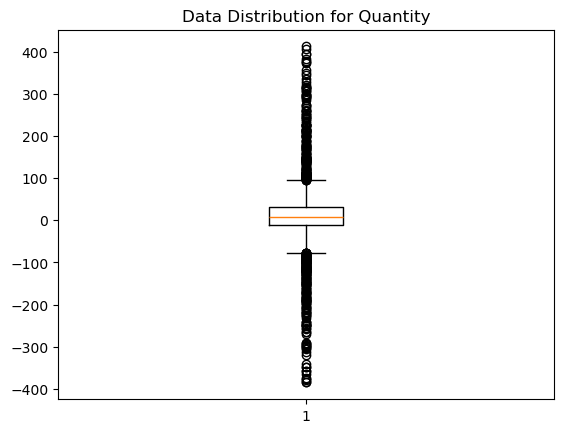

In [292]:
# Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

# Plot a box and whisker plots
plt.boxplot(df_sub.Profit)

# Add titles and labels
plt.title('Data Distribution for Quantity')

# Show the plot
plt.show()

### 3.4 Checking for inmbalanced data

In [309]:
# Imbalanced data by undersampling/oversampling for a particular label.

# The undersampling methods work with the majority class. 
# In these methods, we randomly eliminate instances of the majority class. 
# It reduces the number of observations from majority class to make the dataset balanced. 
# It results in severe loss of information. 
# This method is applicable when the dataset is huge and reducing the number of training samples make the dataset balanced.

df_sub["Segment"].value_counts()
#df_sub["Region"].value_counts()




Segment
Consumer       1067
Corporate       620
Home Office     342
Name: count, dtype: int64

In [311]:
# Imbalanced data by undersampling/oversampling for a particular label.

# A classification data set with skewed class proportions is called imbalanced. 
# Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes.

df_sub["Ship Mode"].value_counts()
#df_sub["Sub-Category"].value_counts()
#df_sub["State"].value_counts()

# While Region has little imbalance, so it should not cause any significant performance degradation. When preforming 

Ship Mode
Standard Class    1187
Second Class       406
First Class        319
Same Day           117
Name: count, dtype: int64

### 3.5 Checking for feature selection

In [ ]:
# Feature selection by selecting the most important features to feed into our model while ignoring any insignificant features.

#df.drop('Country',axis=1,inplace=True)
#df.drop('Row ID',axis=1,inplace=True)

### 3.6 Checking for Data types

In [ ]:
# Convert data types

## 4. Identify correlated variables

In [171]:
#

## 5. Summary

## Bonus